<a href="https://colab.research.google.com/github/haddybhaiya/unsupervised-learning-classes/blob/main/vehicle_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub
pramodchandrayan_vehicle2_path = kagglehub.dataset_download("pramodchandrayan/vehicle2")
print("data source import complete")

Using Colab cache for faster access to the 'vehicle2' dataset.
data source import complete


In [4]:
# let us start by importing the relevant libraries
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from scipy.stats import zscore

# dataset pipeline


In [5]:
import os
vehdf = pd.read_csv(os.path.join(pramodchandrayan_vehicle2_path,'vehicle-2.csv'))

In [6]:
vehdf.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [7]:
vehdf.shape

(846, 19)

In [8]:
vehdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [9]:
vehdf.isnull().sum()

,0
compactness,0
circularity,5
distance_circularity,4
radius_ratio,6
pr.axis_aspect_ratio,2
max.length_aspect_ratio,0
scatter_ratio,1
elongatedness,1
pr.axis_rectangularity,3
max.length_rectangularity,0


In [10]:
vehdf['class'].value_counts()

,count
class,
car,429
bus,218
van,199


In [11]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
columns = vehdf.columns

print(columns)
vehdf['class'] = le.fit_transform(vehdf['class'])
vehdf.shape

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


(846, 19)

In [12]:
vehdf['class'].value_counts()

,count
class,
1,429
0,218
2,199


# EDA Pipeline

In [13]:
vehdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [14]:
from sklearn.impute import SimpleImputer
newdf = vehdf.copy()
X = newdf.iloc[:,0:19]
imputer = SimpleImputer(missing_values = np.nan,strategy = 'median') #use median instead of mean for negotiating outliers
transformed_values = imputer.fit_transform(X)
column = X.columns
print(columns)
newdf = pd.DataFrame(transformed_values,columns = column)
newdf.describe()

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.823877,82.100473,168.874704,61.677305,8.567376,168.887707,40.936170,20.580378,147.998818,188.596927,439.314421,174.706856,72.443262,6.361702,12.600473,188.918440,195.632388,0.977541
std,8.234474,6.134272,15.741569,33.401356,7.882188,4.601217,33.197710,7.811882,2.588558,14.515652,31.360427,176.496341,32.546277,7.468734,4.903244,8.930962,6.152247,7.438797,0.702130
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.250000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000,0.000000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000,1.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.750000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000,1.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000,2.000000


In [15]:
print('original Null values',vehdf.isnull().sum())
print('new Null values',newdf.isnull().sum())

original Null values compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64
new Null values compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity 

# understanding each attribute

In [16]:
newdf.describe().T #transpose

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


In [17]:
import matplotlib.pyplot as plt

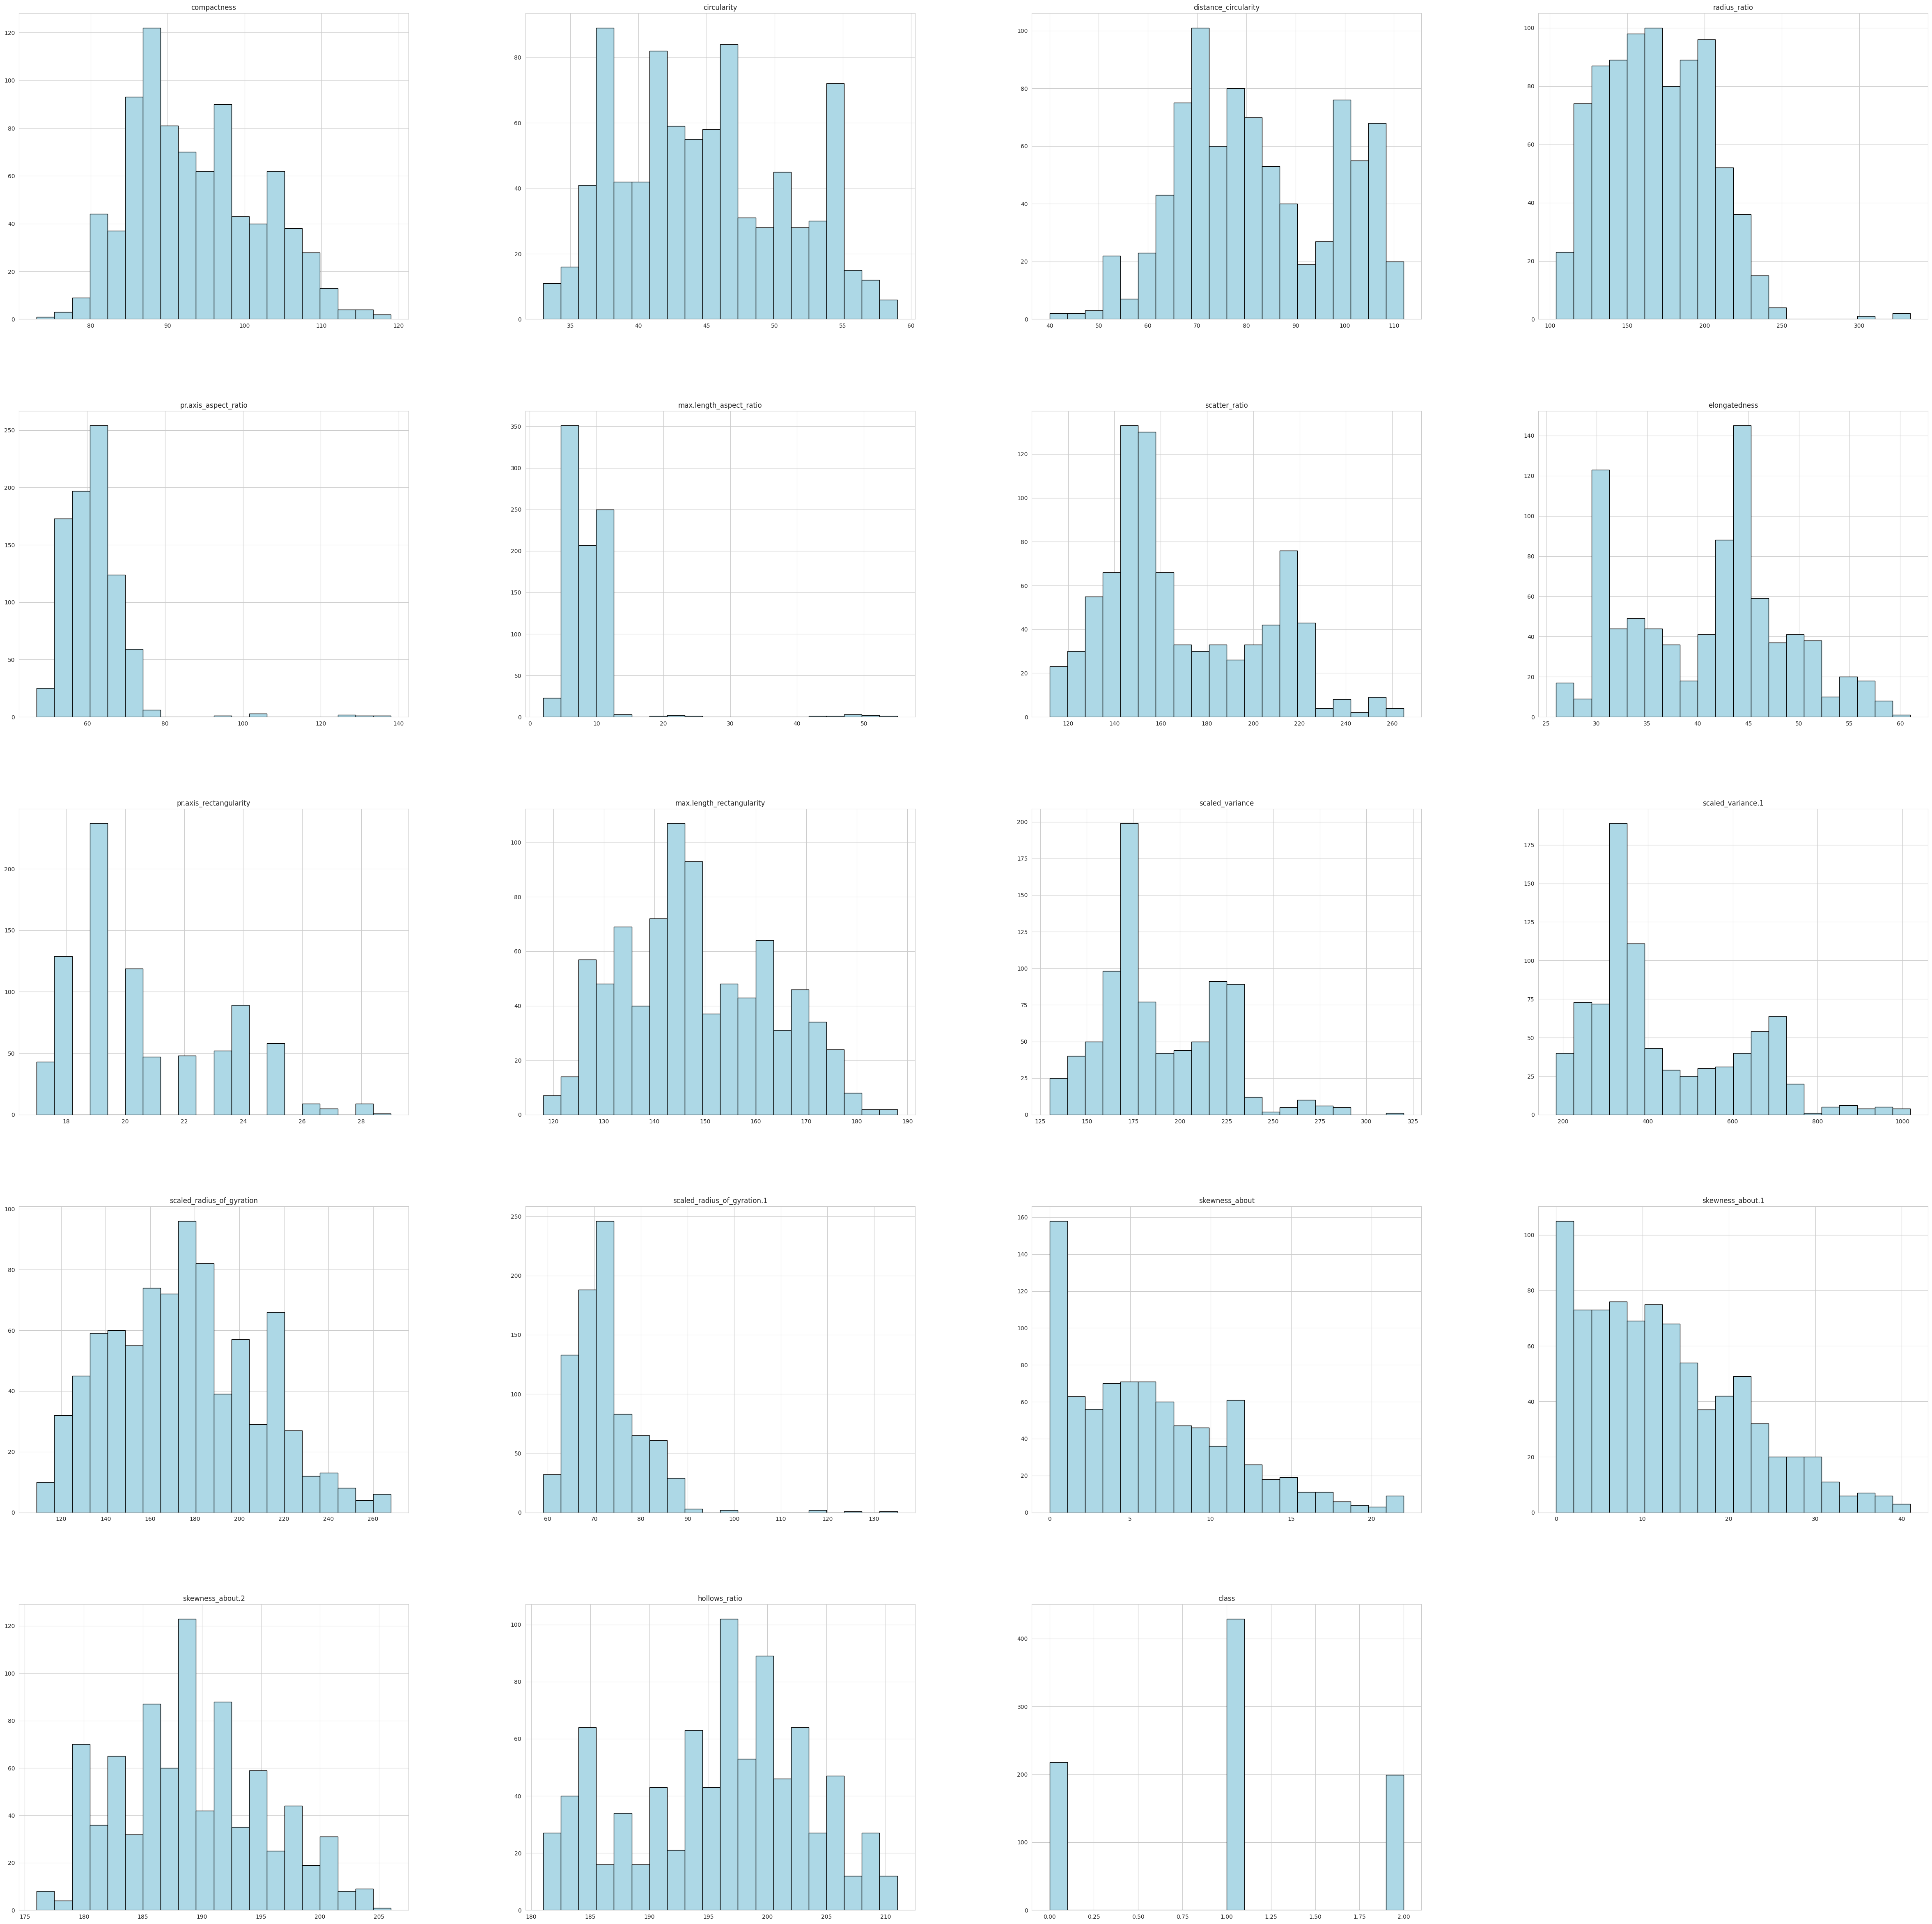

In [18]:
sns.set_style('whitegrid')
newdf.hist(bins = 20,figsize=(60,60),color = 'lightblue',edgecolor = 'black')
plt.show()

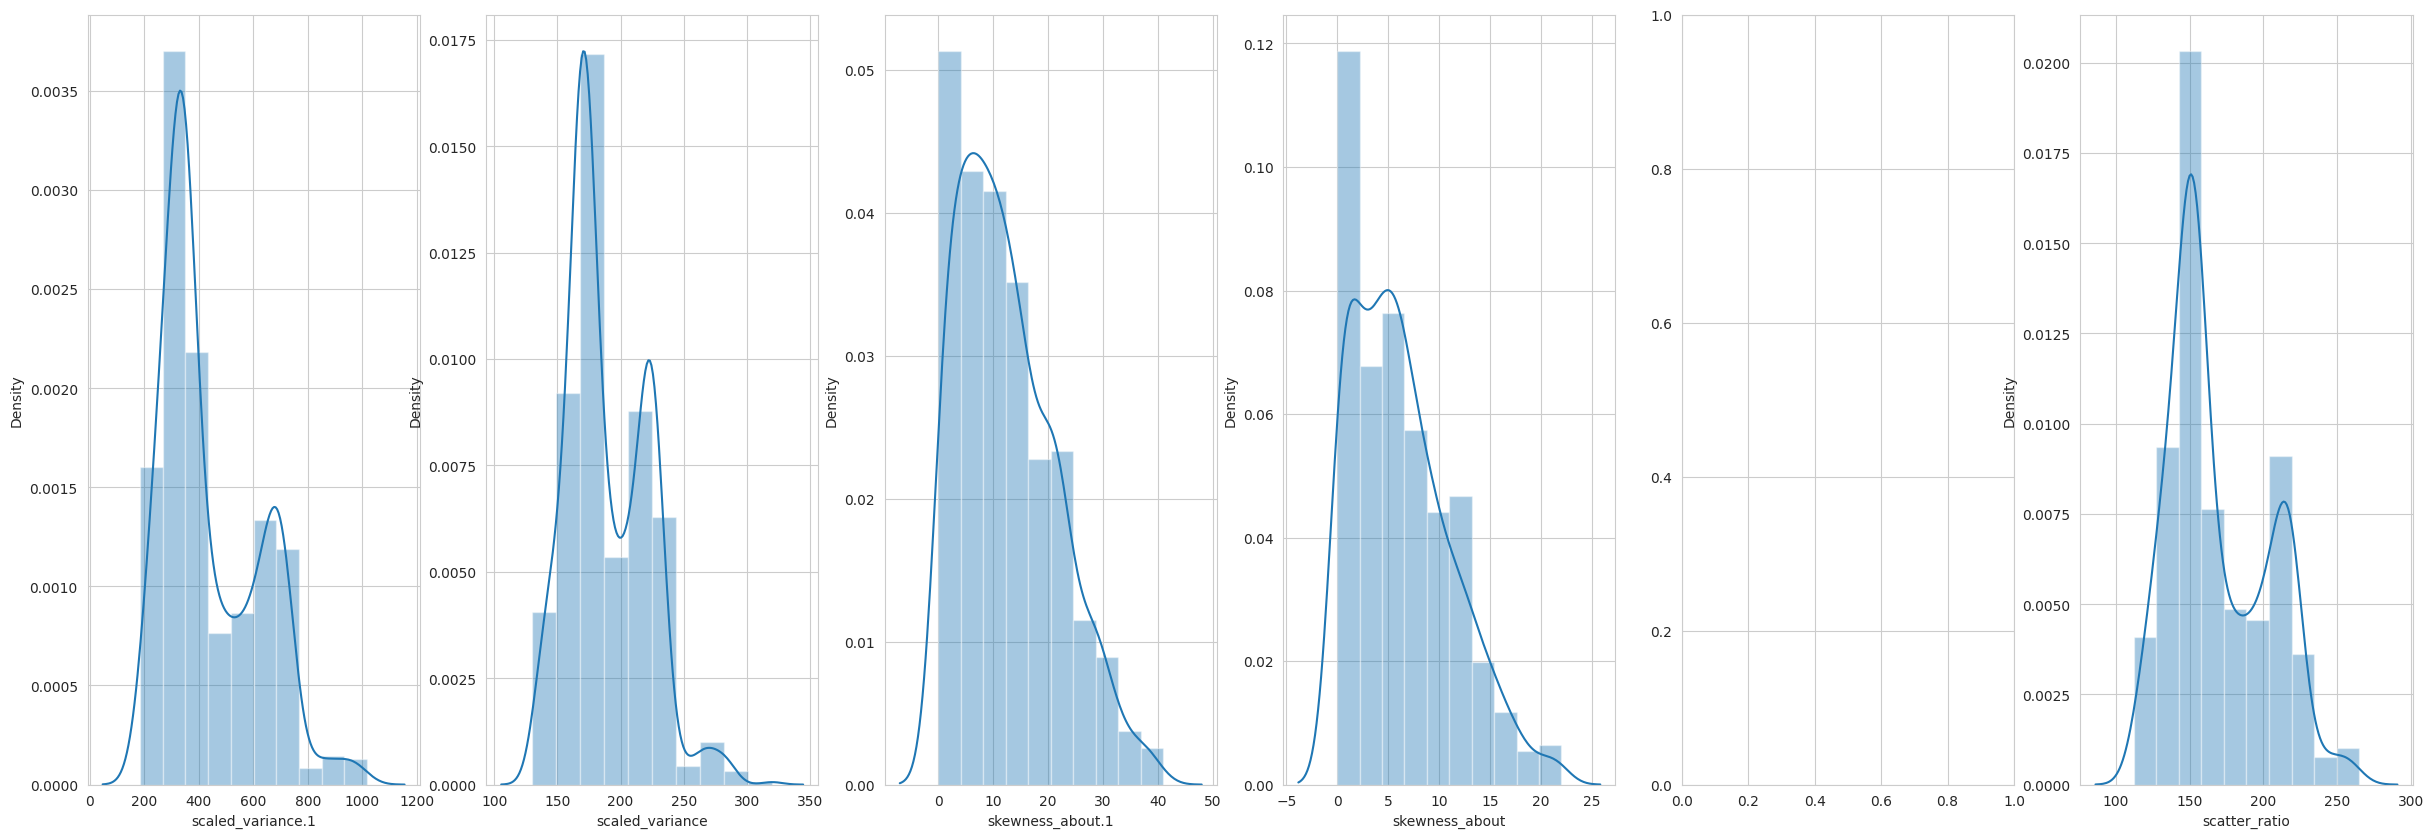

In [19]:
# let us use seaborn distplot to analyze the distribution of our columns and
f,ax = plt.subplots(1,6,figsize=(30,10))
vis1 = sns.distplot(newdf['scaled_variance.1'],bins =10,ax = ax[0])
vis2 = sns.distplot(newdf['scaled_variance'],bins =10,ax = ax[1])
vis3 = sns.distplot(newdf['skewness_about.1'],bins =10,ax = ax[2])
vis4 = sns.distplot(newdf['skewness_about'],bins =10,ax = ax[3])
vis6 = sns.distplot(newdf['scatter_ratio'],bins =10,ax = ax[5])
f.savefig('subplot.png')

In [20]:
skewValue = newdf.skew()
print(skewValue)

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64


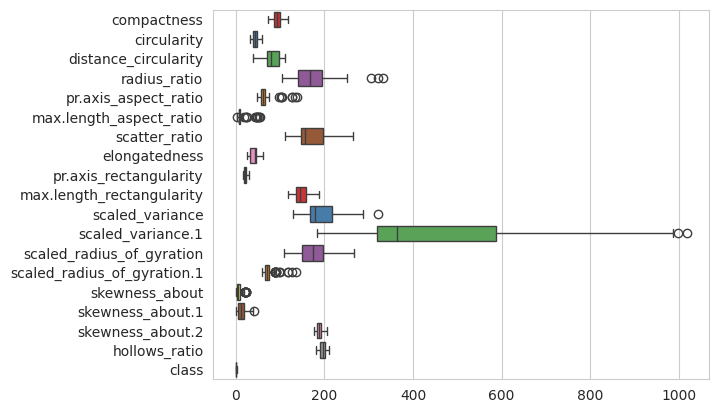

In [21]:
# summary view of all attribute . the we will look into the boxplot individually
ax = sns.boxplot(data=newdf,orient='h',palette='Set1')


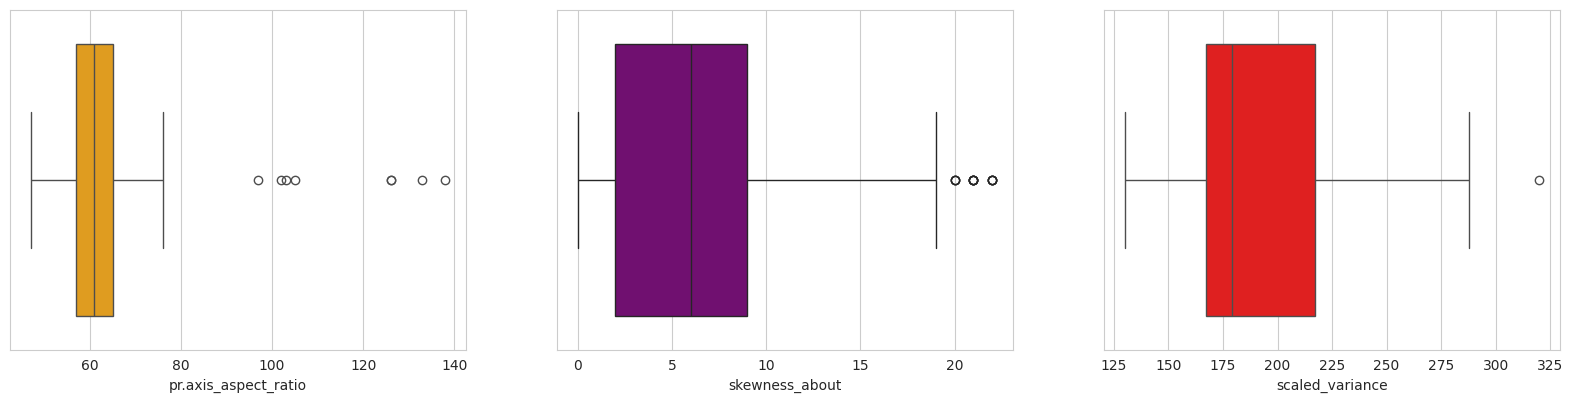

In [22]:
plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x = newdf['pr.axis_aspect_ratio'],color = 'orange')
plt.subplot(3,3,2)
sns.boxplot(x = newdf['skewness_about'],color = 'purple')
plt.subplot(3,3,3)
sns.boxplot(x = newdf['scaled_variance'],color = 'red')
plt.show()

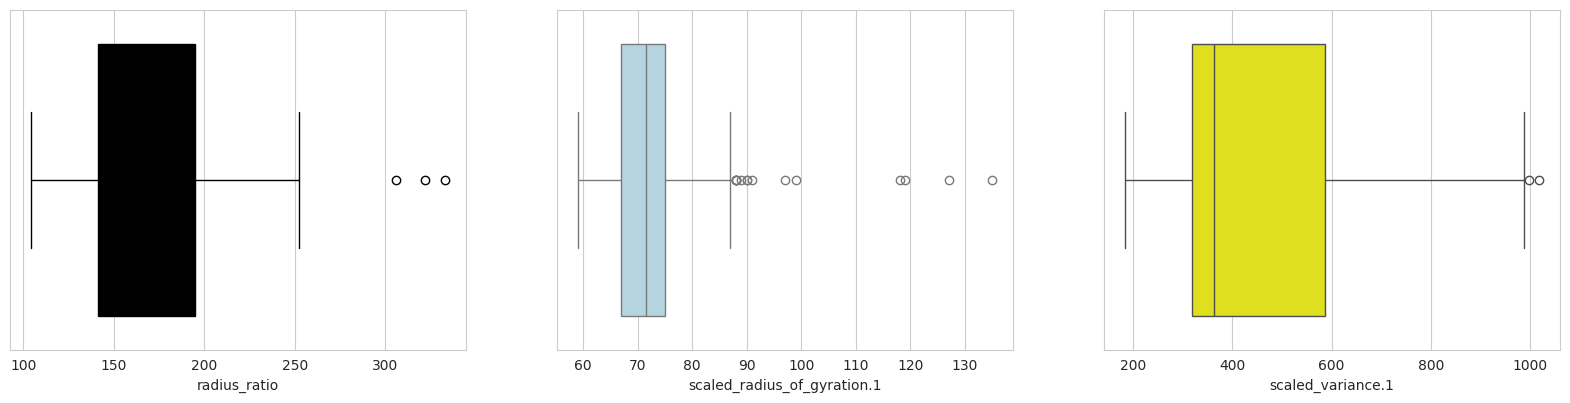

In [23]:
plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x = newdf['radius_ratio'],color = 'black')
plt.subplot(3,3,2)
sns.boxplot(x = newdf['scaled_radius_of_gyration.1'],color = 'lightblue')
plt.subplot(3,3,3)
sns.boxplot(x = newdf['scaled_variance.1'],color = 'yellow')
plt.show()

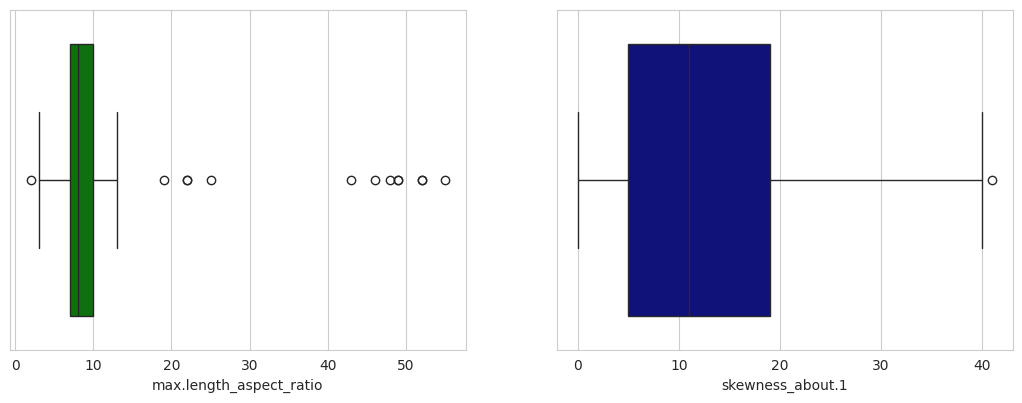

In [24]:
plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
sns.boxplot(x = newdf['max.length_aspect_ratio'],color = 'green')
plt.subplot(3,3,2)
sns.boxplot(x = newdf['skewness_about.1'],color = 'darkblue')
plt.show()

In [25]:
from scipy.stats import iqr
Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
IQR

,0
compactness,13.00
circularity,9.00
distance_circularity,28.00
radius_ratio,54.00
pr.axis_aspect_ratio,8.00
max.length_aspect_ratio,3.00
scatter_ratio,51.00
elongatedness,13.00
pr.axis_rectangularity,4.00
max.length_rectangularity,22.00


In [26]:
cleandf = newdf[~((newdf < (Q1 - 1.5 * IQR)) | (newdf > (Q3 + 1.5 * IQR))).any(axis = 1)]
cleandf.shape

(813, 19)

plotting box once again to see if the outliers are removed

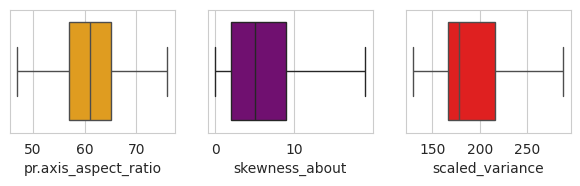

In [27]:
plt.figure(figsize = (20,15))
plt.subplot(8,8,1)
sns.boxplot(x = cleandf['pr.axis_aspect_ratio'],color = 'orange')
plt.subplot(8,8,2)
sns.boxplot(x = cleandf['skewness_about'],color = 'purple')
plt.subplot(8,8,3)
sns.boxplot(x = cleandf['scaled_variance'],color = 'red')
plt.show()

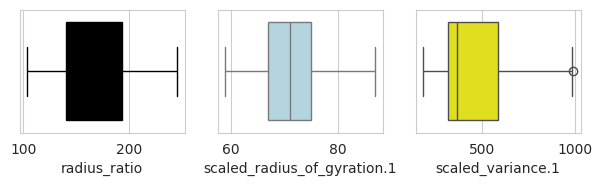

In [28]:
plt.figure(figsize = (20,15))
plt.subplot(8,8,1)
sns.boxplot(x = cleandf['radius_ratio'],color = 'black')
plt.subplot(8,8,2)
sns.boxplot(x = cleandf['scaled_radius_of_gyration.1'],color = 'lightblue')
plt.subplot(8,8,3)
sns.boxplot(x = cleandf['scaled_variance.1'],color = 'yellow')
plt.show()

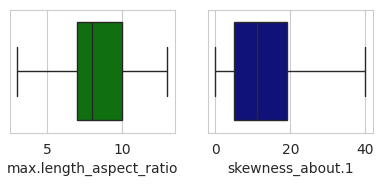

In [29]:
plt.figure(figsize = (20,15))
plt.subplot(8,8,1)
sns.boxplot(x = cleandf['max.length_aspect_ratio'],color = 'green')
plt.subplot(8,8,2)
sns.boxplot(x = cleandf['skewness_about.1'],color = 'darkblue')
plt.show()

In [30]:
def correlation_heatmap(dataframe,l,w):
  correlation = dataframe.corr()
  plt.figure(figsize = (l,w))
  sns.heatmap(correlation,vmax = 1,square = True,annot = True, cmap = 'viridis')
  plt.title('Correlation between different features')
  plt.show();


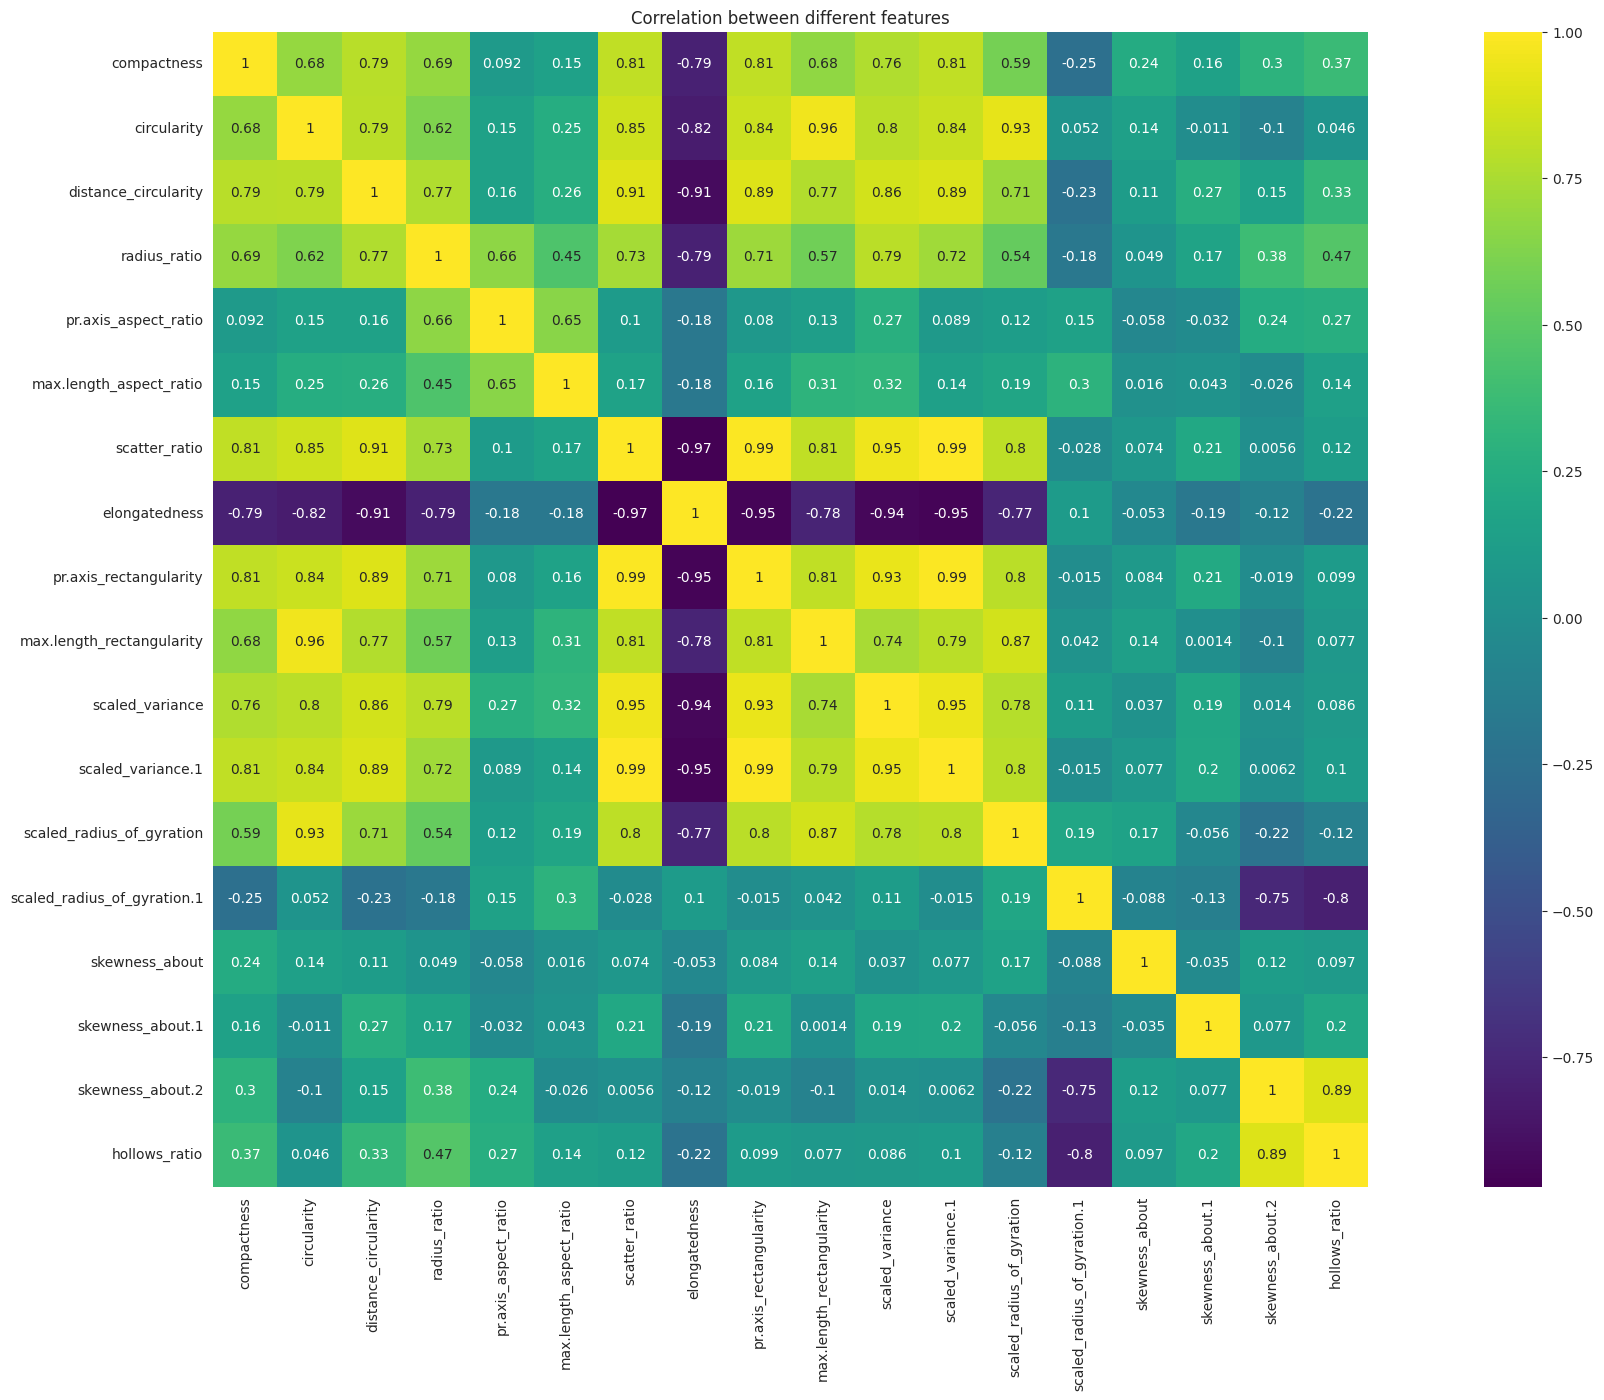

In [31]:

cleandf = newdf.drop('class',axis = 1)
correlation_heatmap(cleandf,30,15)